In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 

In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\Sooraj\Downloads\forestfires (1).csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [6]:
# Checking number of small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

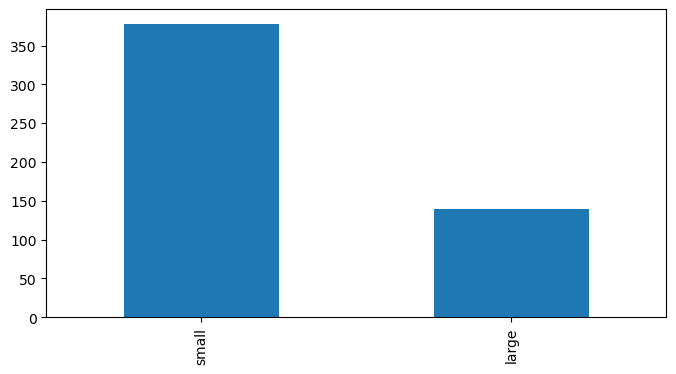

In [7]:
plt.figure(figsize=(8,4))
data.size_category.value_counts().plot.bar();

In [8]:
# Encode categorical features
le_month = LabelEncoder()
le_day = LabelEncoder()
le_size = LabelEncoder()

data['month'] = le_month.fit_transform(data['month'])
data['day'] = le_day.fit_transform(data['day'])
data['size_category'] = le_size.fit_transform(data['size_category'])

In [9]:
# Define features and target variable
X = data.drop('size_category', axis=1)
y = data['size_category']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initialize SVM model
svm_model = SVC()

In [13]:
# Define the parameter grid
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
}

In [14]:
# Perform grid search for each kernel
best_models = {}

for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
    grid_search.fit(X_train_scaled, y_train)
    best_models[kernel] = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.735 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.735 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.723 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.732 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.732 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.795 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.807 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.795 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.805 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.780 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.843 total time=   0.0s
[CV 2/5] END ..............................C=10;,

In [15]:
# Print the best parameters for each kernel
for kernel, model in best_models.items():
    print(f"Best Parameters for {kernel} kernel:", model.get_params())

Best Parameters for linear kernel: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Parameters for rbf kernel: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [16]:
# Perform grid search for each kernel
best_models = {}

for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
    grid_search.fit(X_train_scaled, y_train)
    best_models[kernel] = grid_search.best_estimator_

    # Print the best parameters for each kernel
    print(f"Best Parameters for {kernel} kernel:", grid_search.best_params_)

    # Print additional information (optional)
    print(f"Best Score for {kernel} kernel:", grid_search.best_score_)
    print("Grid Search Results:")
    print(pd.DataFrame(grid_search.cv_results_))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.735 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.735 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.723 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.732 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.732 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.795 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.807 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.795 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.805 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.780 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.843 total time=   0.0s
[CV 2/5] END ..............................C=10;,

In [17]:
# Initialize SVM model with the best parameters
final_svm_model = SVC(C=100, gamma=0.01, kernel='rbf')

In [18]:
# Fit the final model on the scaled training data
final_svm_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.01)

In [19]:
# Make predictions on the scaled test data
y_pred = final_svm_model.predict(X_test_scaled)

In [20]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Final Model: {accuracy * 100:.2f}%")

Accuracy of the Final Model: 95.19%


In [21]:
# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.94      1.00      0.97        76

    accuracy                           0.95       104
   macro avg       0.97      0.91      0.94       104
weighted avg       0.95      0.95      0.95       104

